# K Nearest Neighbors - Projeto

O objetivo deste exercício é dar continuidade com os estudos de Análise Exploratória dos Dados (EDA) e já começar a treinar modelos de classificação com k-NN conforme visto em sala de aula.

Vamos utilizar a base de dados Wine da [UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality). A variável de resposta que temos que modelar é a qualidade do vinho (quality).

Nesse repositório, há dois conjuntos de dados, um com informações de vinho tinto e outra para vinho branco. Esses dados foram extraídos de uma vinícula do Norte de Portugal. Para este exercício, vamos utilizar a base de dados de vinho tinto.

Dicionário da base de dados:
1. acidez fixa / fixed acidity
2. acidez volátil / volatile acidity
3. ácido cítrico / citric acid
4. açúcar residual / residual sugar
5. cloretos / chlorides
6. dióxido de enxofre livre / free sulfur dioxide
7. dióxido de enxofre total / total sulfur dioxide
8. densidade / density
9. pH / pH
10. sulfatos / sulphates
11. álcool/ alcohol
12. **qualidade - quality (score between 0 and 10)**


## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
%matplotlib inline

## Obtenha os dados
** Leia o arquivo csv 'winequality-white.csv' em um DataFrame **

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

** Verifique o cabeçalho do DataFrame.**

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Análise descritiva dos dados

Info - Informações básica do conjunto de dados, tais como tipo de dado e dados faltantes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Describe - Informações de estatística descritiva de dados, tais como média, mediana e desvio-padrão.

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


missingno - Analisa se há dados faltantes ou não.
https://github.com/ResidentMario/missingno

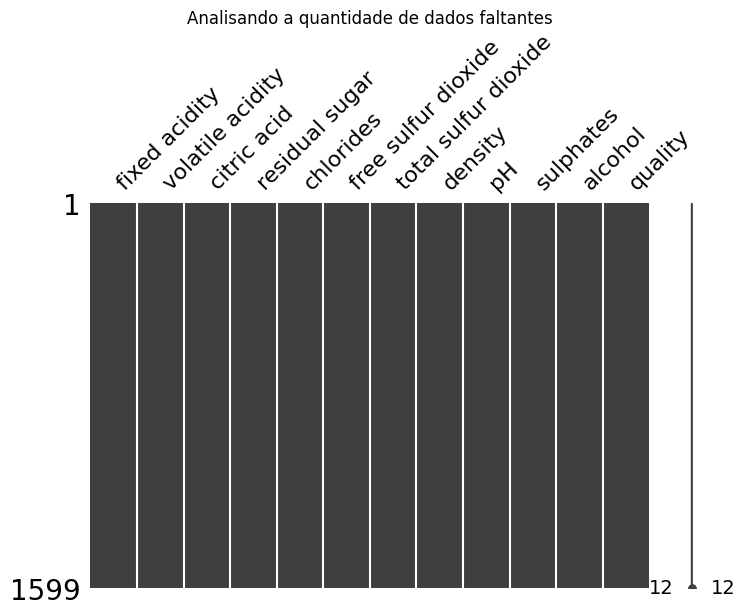

In [ ]:
msn.matrix(df, figsize=(8,5))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

Histograma - Verifica a distribuição dos dados.

/tmp/ipython-input-1099897619.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax, grid=False)


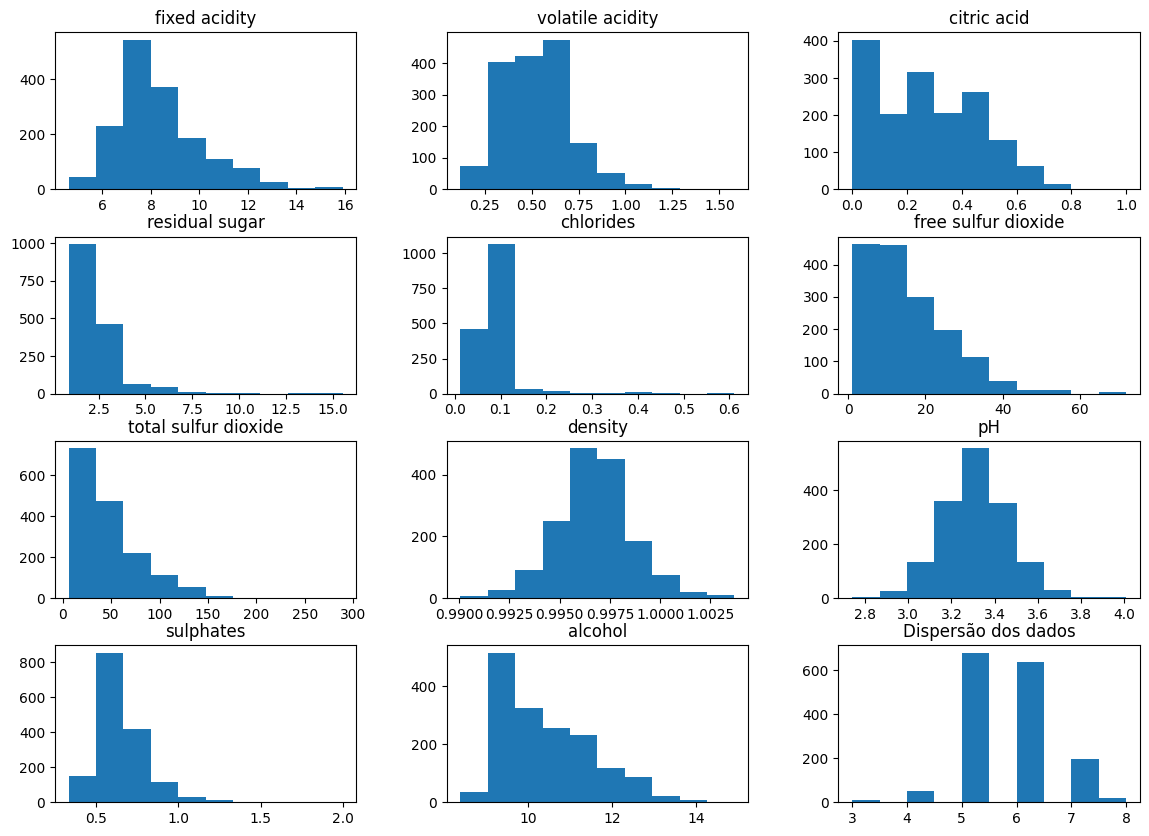

In [ ]:
fig = plt.figure(figsize = (14,10))
ax = fig.gca()
df.hist(ax = ax, grid=False)
plt.title("Dispersão dos dados")
plt.show()

Análise de Correlação - Verifica a corelação linear entre os dados

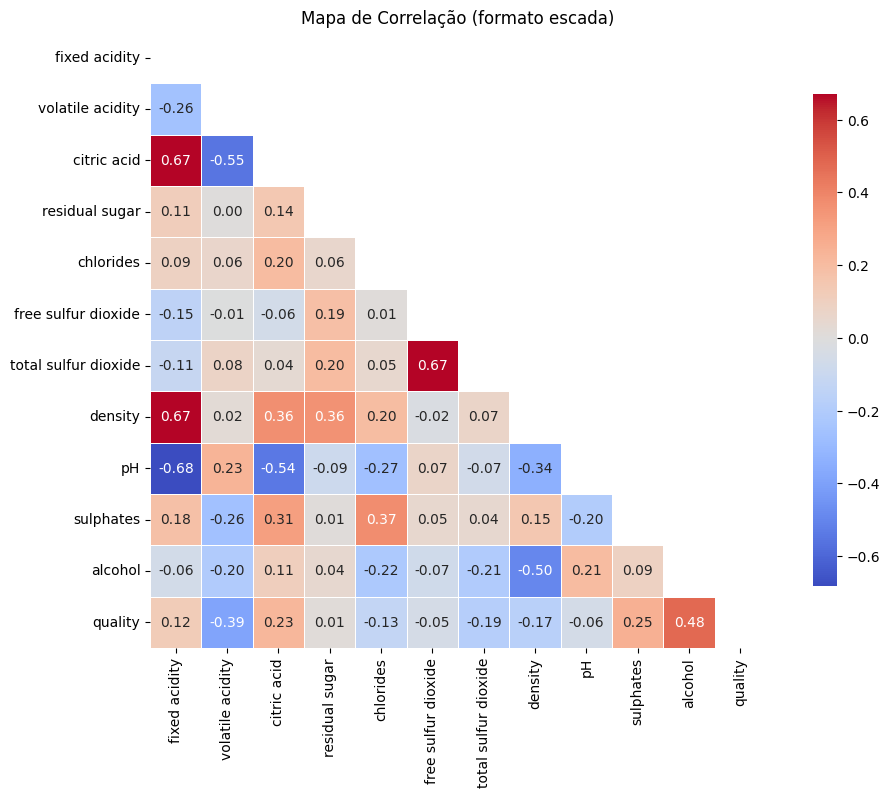

In [ ]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.title("Mapa de Correlação (formato escada)")
plt.show()

Histograma - Verifica a distribuição dos dados.

/tmp/ipython-input-1099897619.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax, grid=False)


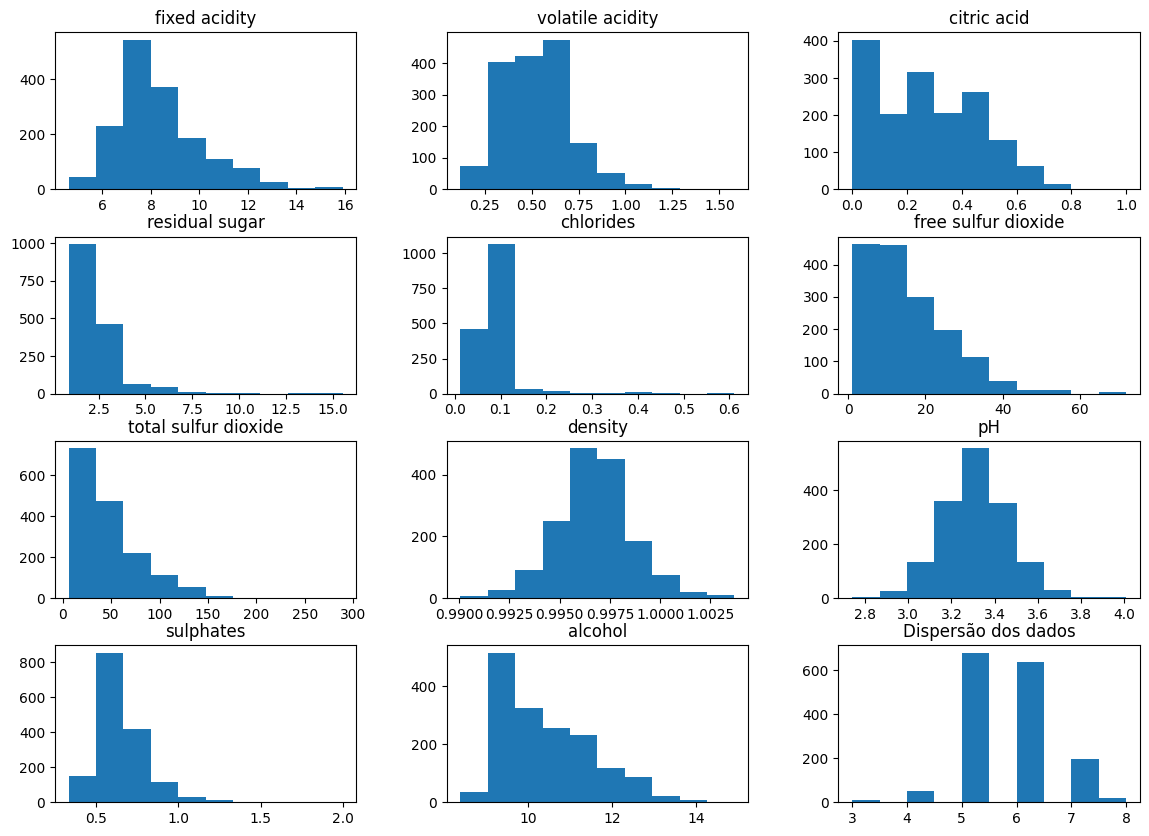

In [ ]:
fig = plt.figure(figsize = (14,10))
ax = fig.gca()
df.hist(ax = ax, grid=False)
plt.title("Dispersão dos dados")
plt.show()

# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['quality']),
                                                    df['quality'],
                                                    test_size=0.25,
                                                    random_state=111)

**Dados de treino**

Features

In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.5
1219,9.0,0.390,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
1158,6.7,0.410,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6
976,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
654,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5


Target

In [ ]:
y_train.head()

,quality
169,5
1219,6
1158,6
976,5
654,5


**Dados de teste**

Features

In [ ]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
660,7.2,0.52,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6
1351,7.2,0.62,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8
230,5.2,0.48,0.04,1.6,0.054,19.0,106.0,0.99270,3.54,0.62,12.2
1111,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3
444,5.3,0.57,0.01,1.7,0.054,5.0,27.0,0.99340,3.57,0.84,12.5


Target

In [ ]:
y_test.head()

,quality
660,6
1351,6
230,7
1111,7
444,7


# Normalização as variáveis

Normalizar os dados. Utilize o StandardScaler do Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

Normalize as variáveis independentes com o StandardScaler

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
X_test_scaled = scaler.transform(X_test)

Análise descritiva dos dados através do describe

In [ ]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03
mean,-7.111353e-17,-1.718577e-16,1.659316e-16,-1.333379e-16,-1.155595e-16,2.074145e-17,-8.889192e-17,7.994347e-15,-2.814911e-16,-1.363009e-16,3.022325e-16
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,-2.180251e+00,-2.260693e+00,-1.384028e+00,-1.134243e+00,-1.555025e+00,-1.418910e+00,-1.223599e+00,-3.612755e+00,-3.688806e+00,-1.873885e+00,-1.895163e+00
25%,-7.143121e-01,-7.381162e-01,-9.242331e-01,-4.481928e-01,-3.554698e-01,-7.981295e-01,-7.368639e-01,-5.814678e-01,-6.498270e-01,-6.254171e-01,-8.638051e-01
50%,-2.452116e-01,-6.598761e-02,-5.573265e-02,-2.423777e-01,-1.724867e-01,-1.773488e-01,-2.501290e-01,2.370901e-02,-3.235653e-03,-2.281774e-01,-2.074863e-01
75%,5.170767e-01,6.061410e-01,8.127678e-01,3.204238e-02,5.115929e-02,4.911842e-01,4.799732e-01,5.775539e-01,5.786965e-01,4.528050e-01,6.363521e-01
max,4.445793e+00,5.749982e+00,3.724799e+00,8.882091e+00,1.062351e+01,5.361925e+00,7.385524e+00,3.746627e+00,4.522904e+00,7.603120e+00,4.199226e+00


Normalize os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou.

In [ ]:
pd.DataFrame(X_train_scaled).head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.479762,0.949064,-0.157909,-0.516798,5.520320,-0.081844,0.510394,-0.192426,-2.007669,5.276430,-0.863805
1,0.399802,-0.779267,0.659503,-0.859823,-0.904419,0.873203,0.114922,-1.067771,-0.714486,0.963542,0.448832
2,-0.948862,-0.669532,0.812768,0.169252,-0.253812,0.586689,0.236606,-0.559854,0.708015,2.836243,0.167553
3,-0.655675,-0.669532,0.148620,-0.310983,-0.111492,1.828250,0.784182,0.131776,0.837333,-0.795663,-0.957565
4,0.165251,-0.340326,1.017121,-0.105168,-0.294475,-0.845882,-0.523917,0.618079,-1.490396,-1.136154,-0.863805


Utilizando o inverse_transform a partir dos dados normalizados para garantir que a normalização está correta.

In [ ]:
X_train_inversed = scaler.inverse_transform(X_train_scaled)
pd.DataFrame(X_train_inversed, columns=X_train.columns).head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.5
1,9.0,0.390,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
2,6.7,0.410,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6
3,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
4,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5


Analisando os dados originais do X_train.

In [ ]:
X_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.5
1219,9.0,0.390,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
1158,6.7,0.410,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6
976,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
654,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5


# Usando o KNN

Importe o KNeighborClassifier do scikit learn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Crie uma instância do modelo KNN com n_neighbors = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

Ajuste este modelo KNN aos dados de treinamento.

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

Use o método de previsão para prever valores usando seu modelo KNN e X_test.

In [ ]:
y_pred = knn.predict(X_test_scaled)

Crie uma matriz de confusão e um relatório de classificação.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score

<Figure size 1600x1200 with 0 Axes>

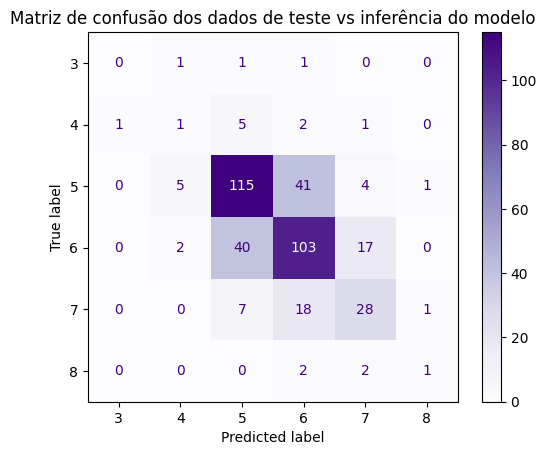

In [ ]:
plt.figure(figsize = (16,12))
labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cmd.plot(cmap=plt.cm.Purples)
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

In [ ]:
y_test.value_counts()

,count
quality,
5,166
6,162
7,54
4,10
8,5
3,3


Analisando o Classification Report


**Dados de teste**

In [ ]:
print("Relatório de classificação:\n")
print(classification_report(y_test, y_pred, labels=labels))

Relatório de classificação:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.11      0.10      0.11        10
           5       0.68      0.69      0.69       166
           6       0.62      0.64      0.63       162
           7       0.54      0.52      0.53        54
           8       0.33      0.20      0.25         5

    accuracy                           0.62       400
   macro avg       0.38      0.36      0.37       400
weighted avg       0.61      0.62      0.62       400



Score do modelo utilizando os dados de teste.

In [ ]:
knn.score(X=X_test_scaled, y=y_test)

0.62

#### Apresente a Curva ROC

Dado que a Curva ROC é uma métrica para valores binários, vamos fazer o cálculo de uma classe e comparar com as demais classes.

Referência:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

É preciso binarizar as variáveis independentes, calcular as probabilidades de cada predição para target e, por fim calcular a curva ROC.

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

Binarização da variável dependente, quality.

In [ ]:
label_binarizer = LabelBinarizer().fit(df['quality'])

In [ ]:
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(400, 6)

Selecionando a qualidade de número **5** pois foi o maior valor obtido pelo modelo.

In [ ]:
class_of_interest = 5
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

np.int64(2)

Calculando as probabilidades dos dados de teste para fazer o cálculo da curva ROC.

In [ ]:
def plot_curva_ROC_one_vs_rest(y_test, y_scores):

  RocCurveDisplay.from_predictions(
      y_onehot_test[:, class_id],
      y_scores[:, class_id],
      name=f"{class_of_interest} vs as demais classes",
  )
  plt.plot([0, 1], [0, 1], "k--", label="valor de threashold (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("Taxa de Falso Positivo")
  plt.ylabel("Taxa de Verdadeira Positivo")
  plt.title("One-vs-Resto curva ROC")
  plt.legend()
  plt.show()

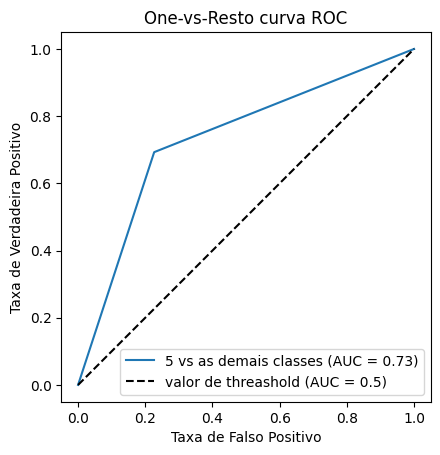

In [ ]:
plot_curva_ROC_one_vs_rest(y_test, y_scores)

# Escolhendo o valor K

Vamos continuar usando o método do cotovelo para escolher um bom valor K!

Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def train_modelo(X_train_scaled, X_test_scaled, y_train, k=1):
  print(f"Treinando o k-NN com k={k}")
  #faça a instância de um novo modelo, treine esse modelo e faça as predições para os dados de teste
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  pred_i = knn.predict(X_test_scaled)
  return pred_i

In [ ]:
error_rate = []

for i in range(1,41):
    pred_i = train_modelo(X_train_scaled, X_test_scaled, y_train, i)
    #calcule e armazene os valores de erro para cada modelo treinado
    error_rate.append(1 - accuracy_score(y_test, pred_i))

Treinando o k-NN com k=1
Treinando o k-NN com k=2
Treinando o k-NN com k=3
Treinando o k-NN com k=4
Treinando o k-NN com k=5
Treinando o k-NN com k=6
Treinando o k-NN com k=7
Treinando o k-NN com k=8
Treinando o k-NN com k=9
Treinando o k-NN com k=10
Treinando o k-NN com k=11
Treinando o k-NN com k=12
Treinando o k-NN com k=13
Treinando o k-NN com k=14
Treinando o k-NN com k=15
Treinando o k-NN com k=16
Treinando o k-NN com k=17
Treinando o k-NN com k=18
Treinando o k-NN com k=19
Treinando o k-NN com k=20
Treinando o k-NN com k=21
Treinando o k-NN com k=22
Treinando o k-NN com k=23
Treinando o k-NN com k=24
Treinando o k-NN com k=25
Treinando o k-NN com k=26
Treinando o k-NN com k=27
Treinando o k-NN com k=28
Treinando o k-NN com k=29
Treinando o k-NN com k=30
Treinando o k-NN com k=31
Treinando o k-NN com k=32
Treinando o k-NN com k=33
Treinando o k-NN com k=34
Treinando o k-NN com k=35
Treinando o k-NN com k=36
Treinando o k-NN com k=37
Treinando o k-NN com k=38
Treinando o k-NN com 

Agora crie o seguinte gráfico usando as informações do seu loop.

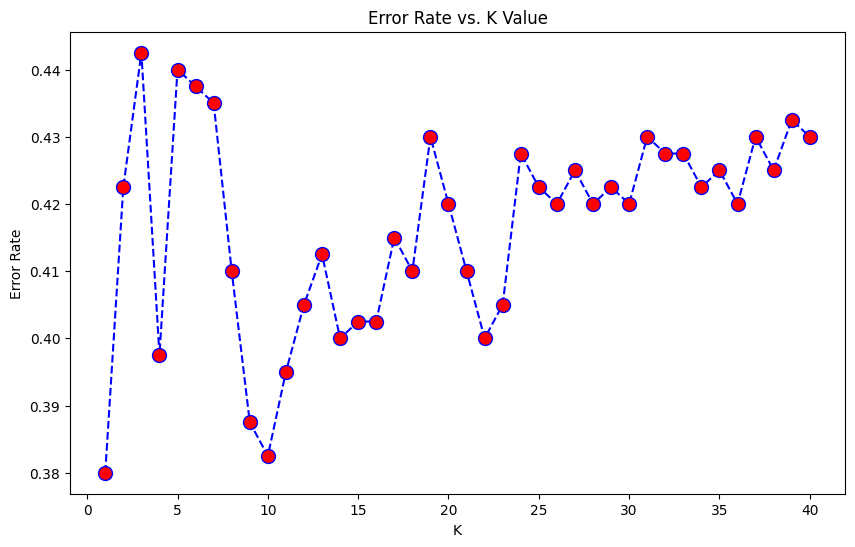

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
res_score = []

for i in range(1,41):
    pred_i = train_modelo(X_train_scaled, X_test_scaled, y_train, i)
    #calcule e armazene os valores de score para cada modelo treinado
    res_score.append(accuracy_score(y_test, pred_i))

Treinando o k-NN com k=1
Treinando o k-NN com k=2
Treinando o k-NN com k=3
Treinando o k-NN com k=4
Treinando o k-NN com k=5
Treinando o k-NN com k=6
Treinando o k-NN com k=7
Treinando o k-NN com k=8
Treinando o k-NN com k=9
Treinando o k-NN com k=10
Treinando o k-NN com k=11
Treinando o k-NN com k=12
Treinando o k-NN com k=13
Treinando o k-NN com k=14
Treinando o k-NN com k=15
Treinando o k-NN com k=16
Treinando o k-NN com k=17
Treinando o k-NN com k=18
Treinando o k-NN com k=19
Treinando o k-NN com k=20
Treinando o k-NN com k=21
Treinando o k-NN com k=22
Treinando o k-NN com k=23
Treinando o k-NN com k=24
Treinando o k-NN com k=25
Treinando o k-NN com k=26
Treinando o k-NN com k=27
Treinando o k-NN com k=28
Treinando o k-NN com k=29
Treinando o k-NN com k=30
Treinando o k-NN com k=31
Treinando o k-NN com k=32
Treinando o k-NN com k=33
Treinando o k-NN com k=34
Treinando o k-NN com k=35
Treinando o k-NN com k=36
Treinando o k-NN com k=37
Treinando o k-NN com k=38
Treinando o k-NN com 

## Treine seu modelo novamente com novo valor K

Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão.

#### k=3

In [ ]:
y_scores_k3 = knn_3.predict_proba(X_test_scaled)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        10
           5       0.63      0.67      0.65       166
           6       0.53      0.56      0.54       162
           7       0.51      0.41      0.45        54
           8       0.00      0.00      0.00         5

    accuracy                           0.56       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.55      0.56      0.55       400



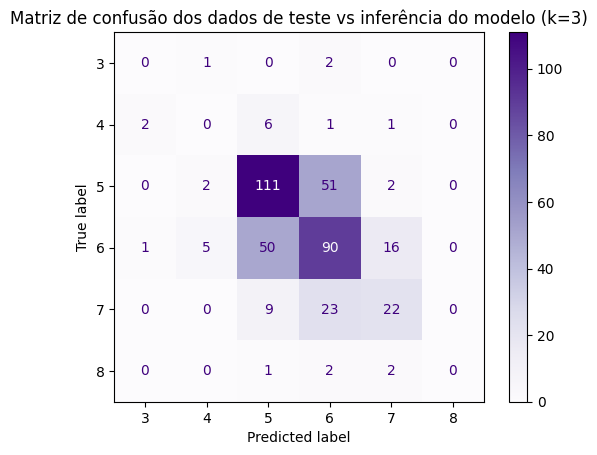

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_scaled, y_train)
y_pred_3 = knn_3.predict(X_test_scaled)

print(classification_report(y_test,y_pred_3, zero_division=0))
cm_3 = confusion_matrix(y_test, y_pred_3, labels=labels)
cmd_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=labels)
cmd_3.plot(cmap=plt.cm.Purples)
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo (k=3)")
plt.show()

Calculando as probabilidades para o modelo de k=3

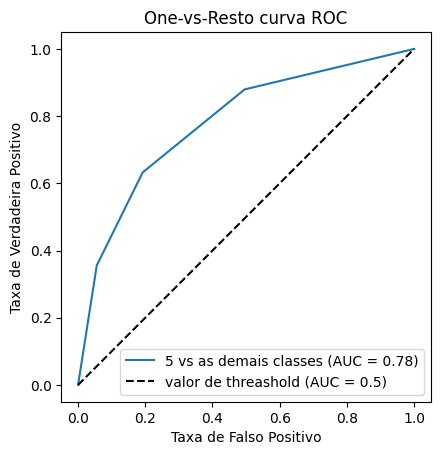

In [ ]:
plot_curva_ROC_one_vs_rest(y_test, y_scores_k3)

#### k=11

In [ ]:
y_scores_k11 = knn_11.predict_proba(X_test_scaled)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        10
           5       0.66      0.74      0.70       166
           6       0.56      0.61      0.58       162
           7       0.54      0.37      0.44        54
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.29      0.29      0.29       400
weighted avg       0.58      0.60      0.59       400



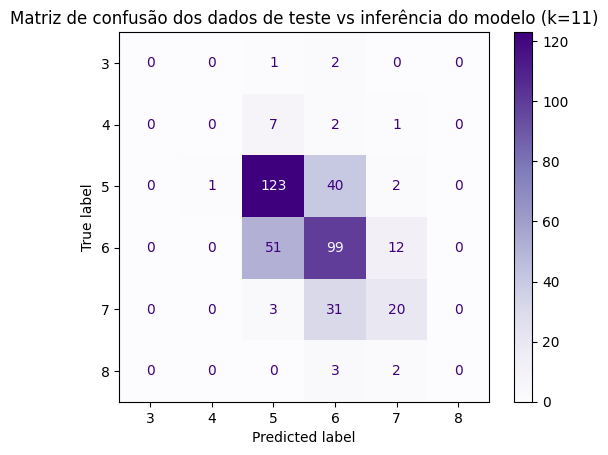

In [ ]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train_scaled, y_train)
y_pred_11 = knn_11.predict(X_test_scaled)

print(classification_report(y_test, y_pred_11, zero_division=0))
cm_11 = confusion_matrix(y_test, y_pred_11, labels=labels)
cmd_11 = ConfusionMatrixDisplay(confusion_matrix=cm_11, display_labels=labels)
cmd_11.plot(cmap=plt.cm.Purples)
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo (k=11)")
plt.show()

Calculando as probabilidades para o modelo de k=11

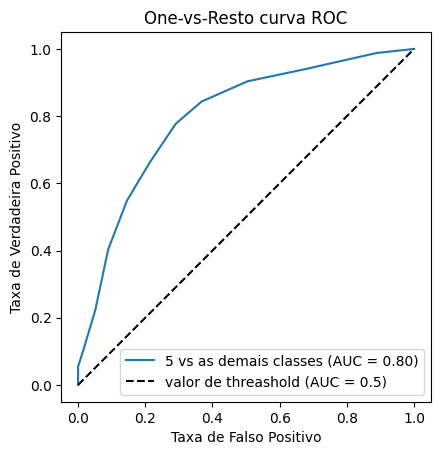

In [ ]:
plot_curva_ROC_one_vs_rest(y_test, y_scores_k11)

## Conclusão

Descreva quais foram as abordagens utilizadas para resolver o problema, desde análise descritiva dos dados até a utilização do método do cotovelo. E qual foi o melhor valor de k, e por quê?



Neste projeto, realizamos uma análise exploratória dos dados da base de dados de vinho tinto da UCI, incluindo a verificação de informações básicas, estatísticas descritivas, análise de dados faltantes e análise de correlação.

Em seguida, dividimos os dados em conjuntos de treino e teste e normalizamos as variáveis independentes usando o `StandardScaler`.

Utilizamos o algoritmo K-Nearest Neighbors (KNN) para modelar a qualidade do vinho. Treinamos o modelo para diferentes valores de K e calculamos a taxa de erro e o score para cada um. Através do método do cotovelo, analisamos o gráfico da taxa de erro versus o valor de K para identificar o ponto onde a diminuição do erro se torna menos significativa, sugerindo um valor ideal para K.

Avaliamos o desempenho do modelo KNN para diferentes valores de K (por exemplo, k=1, k=3 e k=11) utilizando a matriz de confusão e o relatório de classificação.

